In [1]:
from transformations.Compose import Compose
from transformations.BrightnessContrastTransform import BrightnessContrastTransform
from transformations.PerspectiveTransform import PerspectiveTransform
from transformations.Resize import Resize
import glob
import cv2
from PIL import Image,ImageDraw
import numpy as np
import re,json,os
from pathlib import Path

In [2]:
def imshow(a):
    a = a.clip(0, 255).astype('uint8')
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))

In [3]:
files = glob.glob("../interim_data/*.png")
files = [f.rstrip(".png") for f in files]

In [6]:
transforms = Compose([
    PerspectiveTransform(degrees_range=(0, 45)),
    BrightnessContrastTransform(),
    Resize(size_range=(400,600))
])

(490, 360, 4)


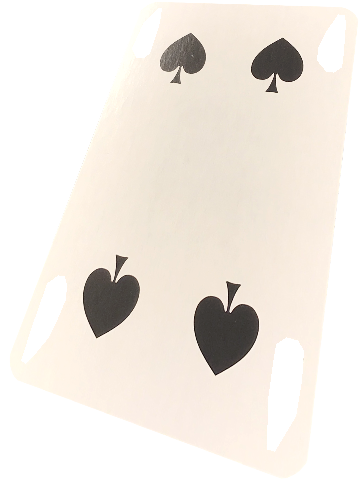

(477, 483, 4)


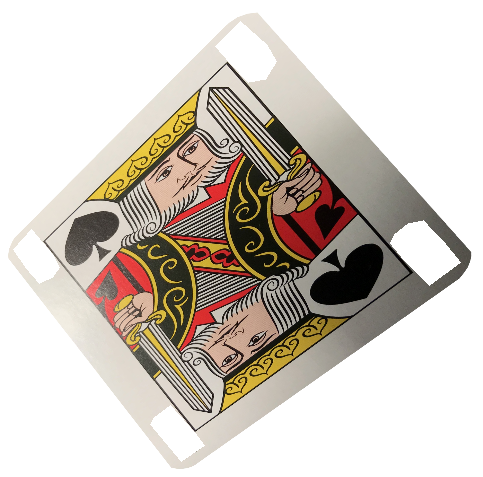

(485, 339, 4)


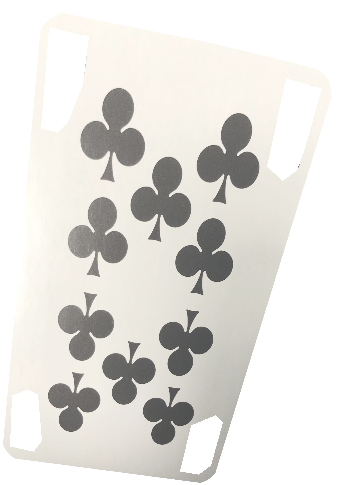

(533, 522, 4)


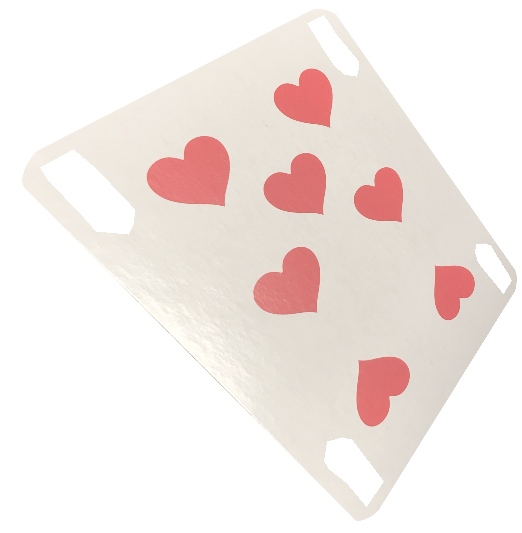

(559, 537, 4)


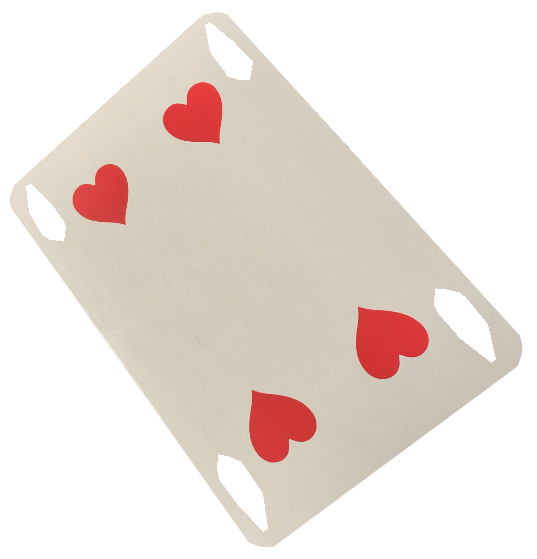

(521, 360, 4)


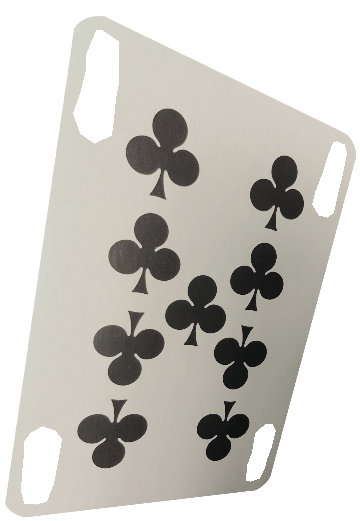

(437, 387, 4)


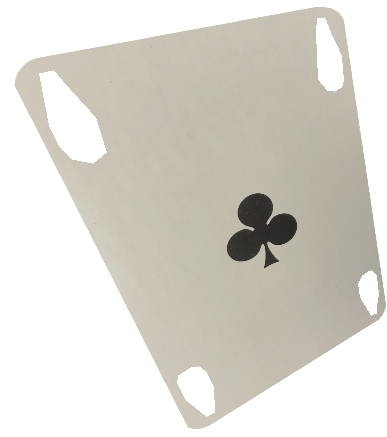

(452, 300, 4)


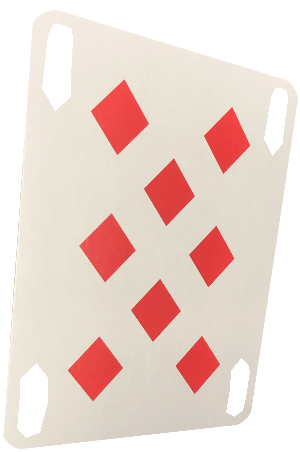

(546, 478, 4)


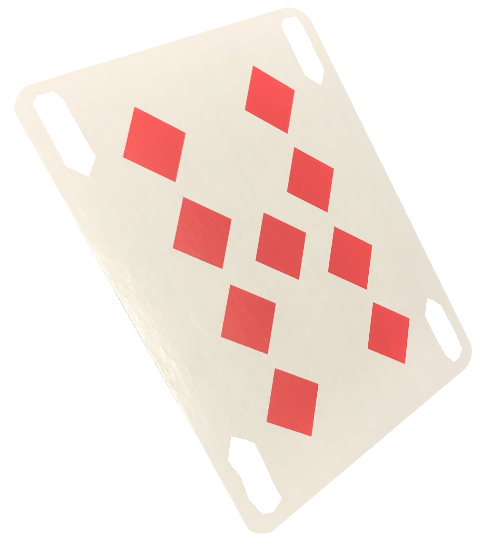

(560, 417, 4)


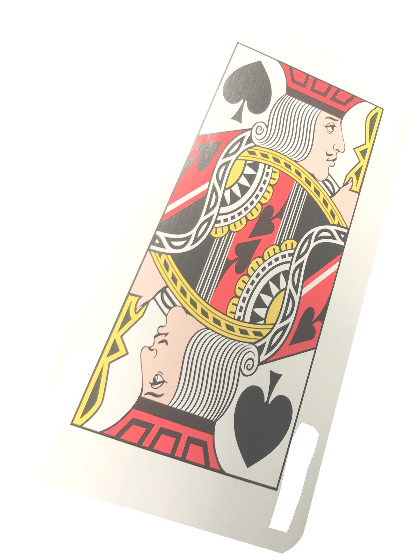

(421, 378, 4)


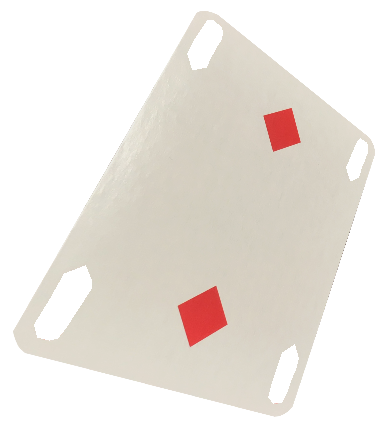

(436, 422, 4)


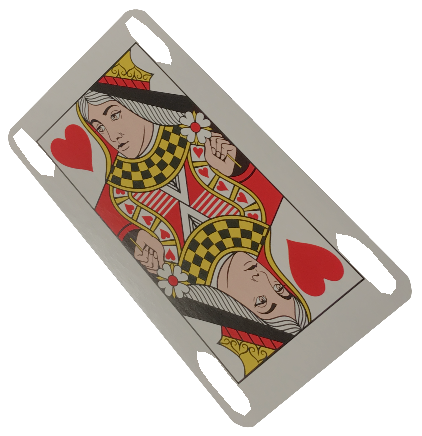

(435, 401, 4)


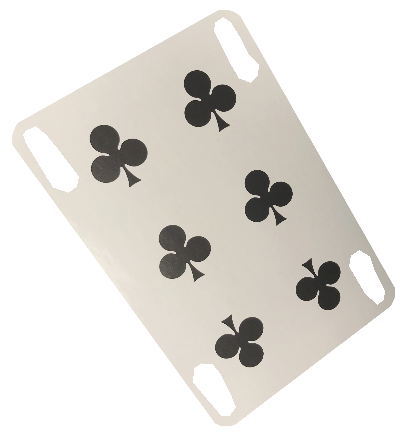

(542, 450, 4)


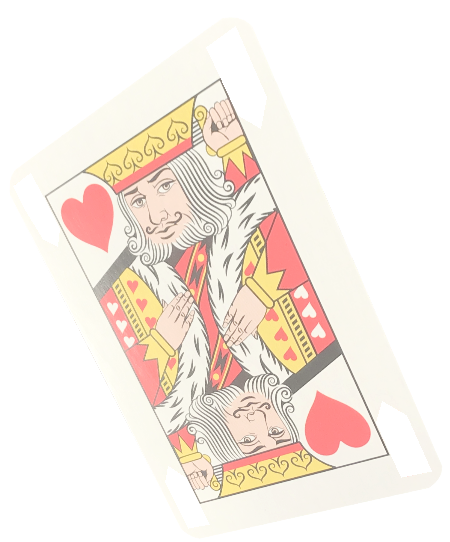

(414, 389, 4)


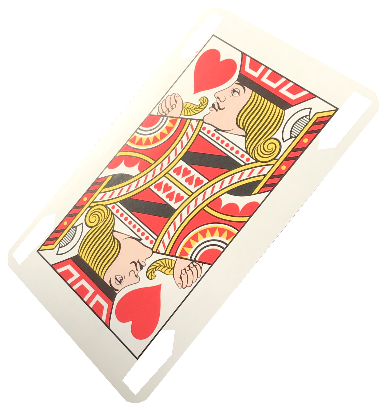

(463, 420, 4)


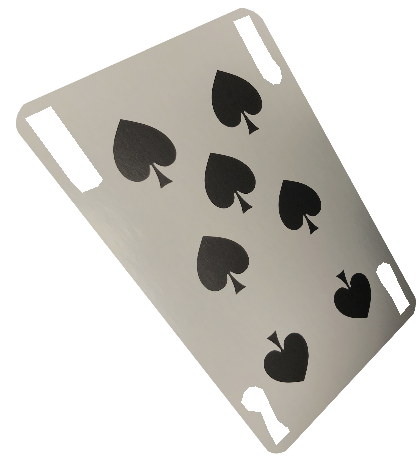

(416, 396, 4)


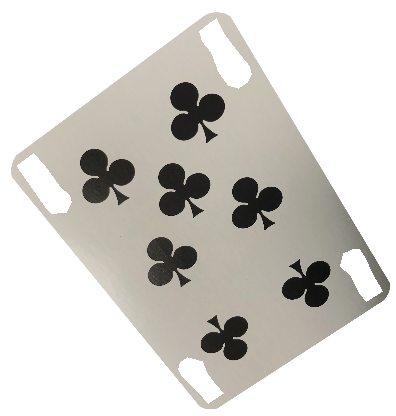

(520, 365, 4)


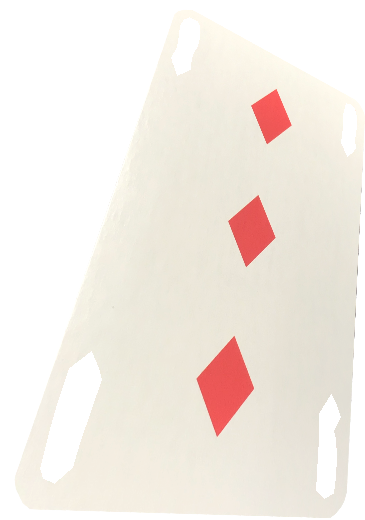

(470, 277, 4)


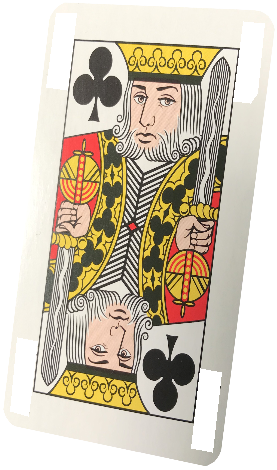

(403, 365, 4)


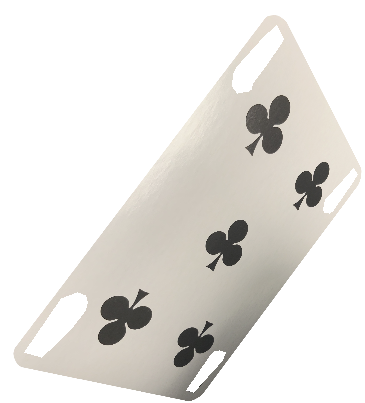

(508, 456, 4)


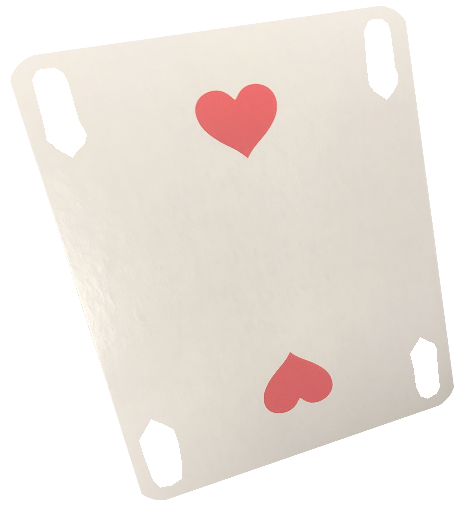

(514, 492, 4)


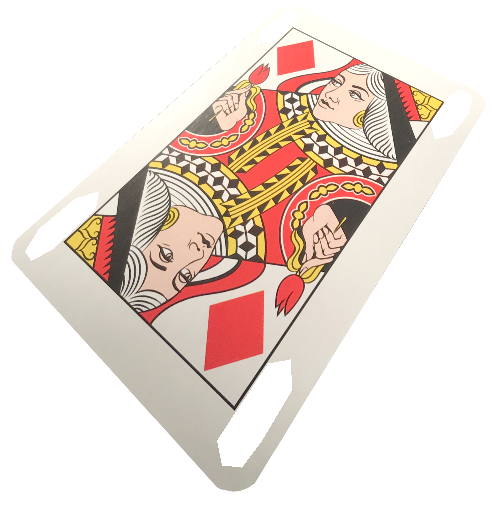

(585, 426, 4)


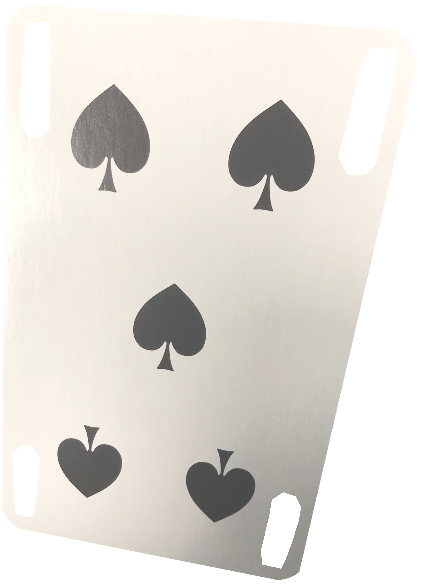

(418, 352, 4)


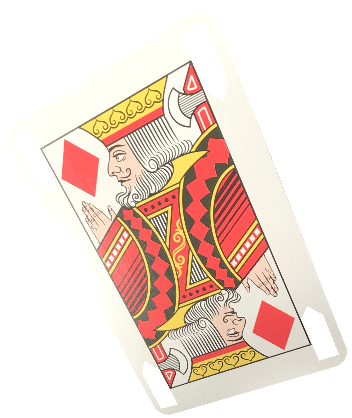

(543, 396, 4)


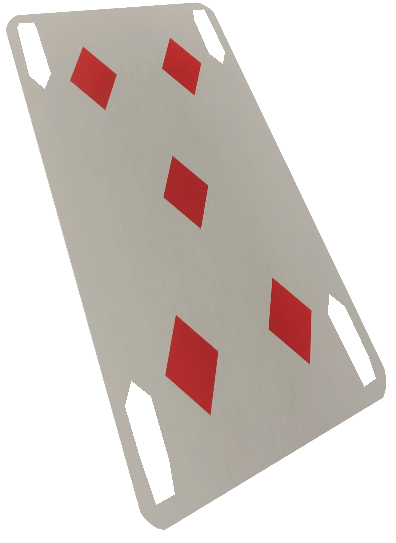

(460, 427, 4)


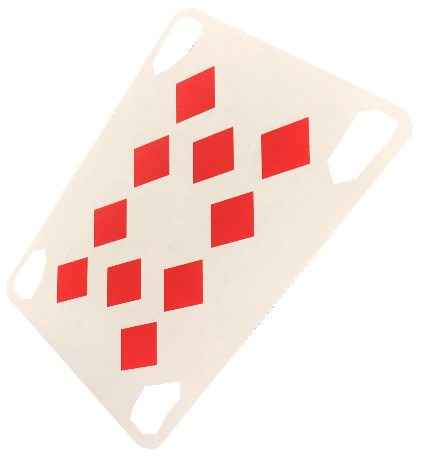

(402, 281, 4)


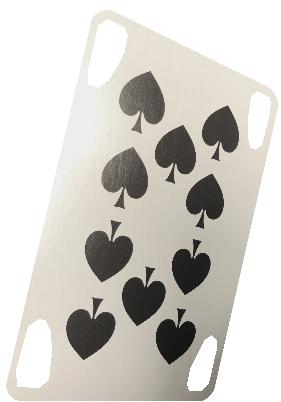

(501, 401, 4)


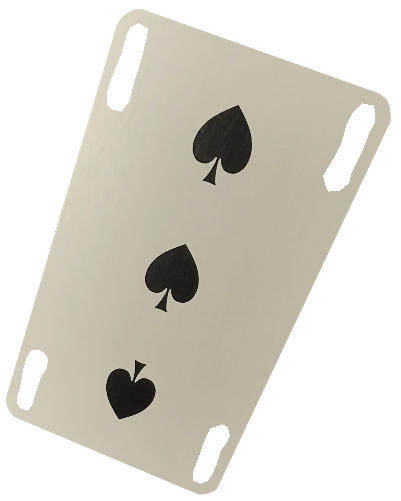

(535, 516, 4)


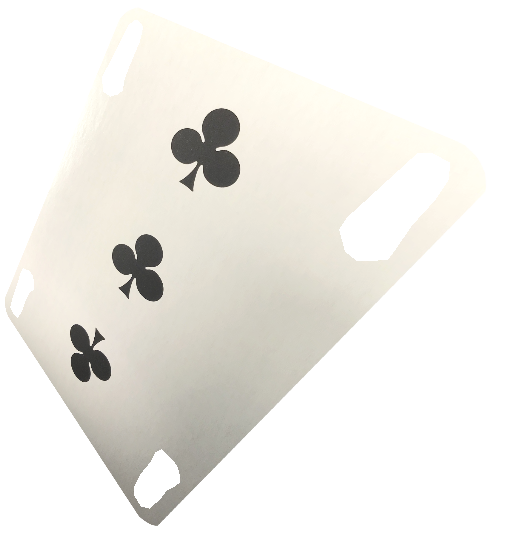

(487, 381, 4)


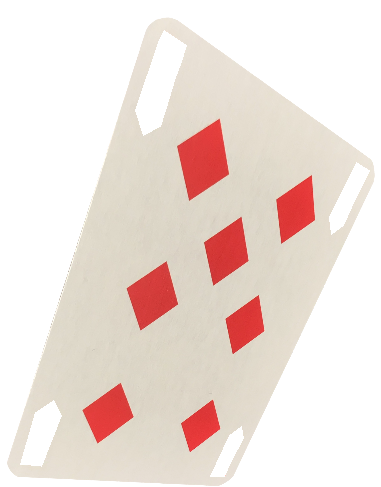

(431, 371, 4)


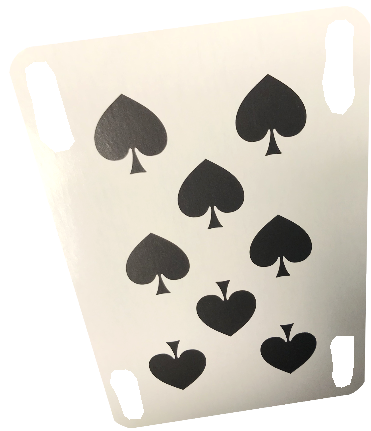

(541, 506, 4)


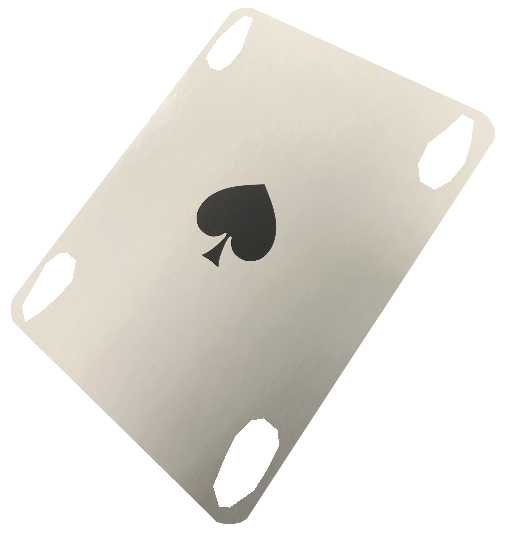

(544, 460, 4)


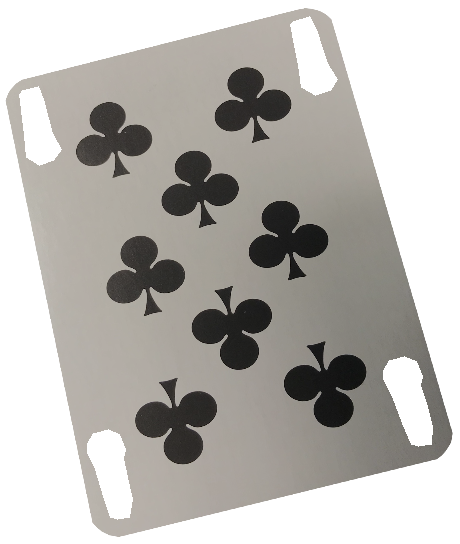

(439, 424, 4)


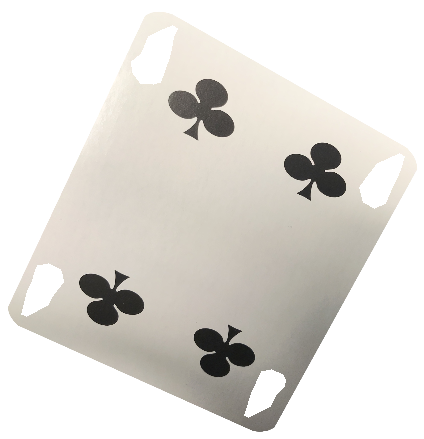

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-c03c3d74761c>", line 2, in <module>
    image = cv2.imread(file+".png",-1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", l

TypeError: object of type 'NoneType' has no len()

In [5]:
for file in files:
    image = cv2.imread(file+".png",-1)
    annots = json.load(open(file+".json","r"))
#     print(annots)
    template = {'image':image,"card_polygon":annots['card_polygon'],'label_polygons':annots['label_polygons']}
    aug_card = transforms(template)
    print(aug_card['image'].shape)
    test = Image.fromarray(aug_card['image'])
    
    for polygon in aug_card['label_polygons']:
        polygon = [tuple(x) for x in polygon]
        ImageDraw.Draw(test).polygon(polygon,fill=255,outline=255)
#     Image
    
    imshow(np.array(test))
#     break